Učitavanje biblioteka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Učitavanje podataka, ispis početnog dijela podataka. <br>

In [2]:
data = pd.read_csv("shot_logs.csv")
data.head(10)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


In [3]:
data.shape

(128069, 21)

In [4]:
data.dtypes

GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOSE_DEF_DIST                float64
FGM                             int64
PTS                             int64
player_name                    object
player_id                       int64
dtype: object

Pojašnjenja značajki:
- GAME_ID - identifikacijski broj igre, integer
- MATCHUP - sadrži datum igre i timove koji su sudjelovali, string
- LOCATION - lokacija utakmice - H (domaća) ili A (gostujuća), string
- GAME_OUTCOME - ishod - W (pobjeda), L (poraz), string
- FINAL_MARGIN - završna razlika u bodovima, integer
- SHOT_NUMBER - redni broj pojedinog igrača u određenoj utakmici, integer <br>
...<br>
...<br>
...<br>
- player_id - identifikacijski broj igrača, integer

Promjena vrijednosti GAME_CLOCK iz time stringa u sekunde

In [5]:
def get_seconds(time_str):
    mm, ss = time_str.split(':')
    return int(mm) * 60 + int(ss)

data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(get_seconds)

In [6]:
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,69,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,707,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,634,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Izbacivanje kategoričkih varijabli

In [7]:
data.drop(['GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID',
          'player_name', 'player_id'], axis = 1, inplace = True)
data.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
0,A,W,24,1,1,69,10.8,2,1.9,7.7,2,made,1.3,1,2
1,A,W,24,2,1,14,3.4,0,0.8,28.2,3,missed,6.1,0,0
2,A,W,24,3,1,0,NaN,3,2.7,10.1,2,missed,0.9,0,0
3,A,W,24,4,2,707,10.3,2,1.9,17.2,2,missed,3.4,0,0
4,A,W,24,5,2,634,10.9,2,2.7,3.7,2,missed,1.1,0,0


Pretvorba varijabli značajki LOCATION, W, SHOT_RESULT u numeričke (0 ili 1)
- H = 1, A = 0
- W = 1, L = 0
- made = 1, missed = 0

In [8]:
def change_var(text):
    if text == "H" or text == "W" or text == "made":
        return 1
    return 0

data['LOCATION'] = data['LOCATION'].apply(change_var)
data['W'] = data['W'].apply(change_var)
data['SHOT_RESULT'] = data['SHOT_RESULT'].apply(change_var)
data.head()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,PTS
0,0,1,24,1,1,69,10.8,2,1.9,7.7,2,1,1.3,1,2
1,0,1,24,2,1,14,3.4,0,0.8,28.2,3,0,6.1,0,0
2,0,1,24,3,1,0,NaN,3,2.7,10.1,2,0,0.9,0,0
3,0,1,24,4,2,707,10.3,2,1.9,17.2,2,0,3.4,0,0
4,0,1,24,5,2,634,10.9,2,2.7,3.7,2,0,1.1,0,0


Vidimo da je FGM (field goals made) sada isto što i SHOT_RESULT, a PTS je 0 kad
koš nije postignut (možemo vidjeti je li dvica ili trica iz PTS_TYPE), a 2 ili 3 kada je postignut, pa mičemo FGM i PTS:

In [9]:
data.drop(['FGM', 'PTS'], axis = 1, inplace = True)

Matrica korelacija:

In [10]:
data.corr()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
LOCATION,1.000000,0.115854,0.155075,-0.003267,0.003064,0.001685,0.008083,-0.014873,-0.012914,-0.001589,0.005012,0.008093,0.003579
W,0.115854,1.000000,0.809887,-0.004633,-0.009667,0.013833,-0.021923,0.013406,0.013839,0.004876,0.013865,0.050239,0.028071
FINAL_MARGIN,0.155075,0.809887,1.000000,0.000836,-0.003078,0.005975,-0.009276,0.011739,0.010788,0.008876,0.024134,0.058762,0.033064
SHOT_NUMBER,-0.003267,-0.004633,0.000836,1.000000,0.654932,-0.237956,-0.032683,0.141100,0.144071,0.011541,0.003054,-0.008351,-0.037769
PERIOD,0.003064,-0.009667,-0.003078,0.654932,1.000000,-0.027042,-0.051796,0.055301,0.046089,0.030080,0.048915,-0.014082,-0.010204
GAME_CLOCK,0.001685,0.013833,0.005975,-0.237956,-0.027042,1.000000,0.021242,-0.116189,-0.103308,-0.021729,-0.048474,0.011476,0.007455
SHOT_CLOCK,0.008083,-0.021923,-0.009276,-0.032683,-0.051796,0.021242,1.000000,-0.082771,-0.147688,-0.173026,-0.032809,0.096855,0.026558
DRIBBLES,-0.014873,0.013406,0.011739,0.141100,0.055301,-0.116189,-0.082771,1.000000,0.914311,-0.082540,-0.169016,-0.034390,-0.153674
TOUCH_TIME,-0.012914,0.013839,0.010788,0.144071,0.046089,-0.103308,-0.147688,0.914311,1.000000,-0.085165,-0.181007,-0.045299,-0.164737
SHOT_DIST,-0.001589,0.004876,0.008876,0.011541,0.030080,-0.021729,-0.173026,-0.082540,-0.085165,1.000000,0.740933,-0.191704,0.523192


In [31]:
data.describe()

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
count,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000,122203.000000
mean,0.499529,0.507402,0.253603,6.475717,2.471641,361.094269,12.450301,1.994084,2.759785,13.449139,2.258652,0.456495,4.122839
std,0.500002,0.499947,13.312980,4.681851,1.137948,202.030587,5.756509,3.413942,2.935379,8.776124,0.437896,0.498106,2.751535
min,0.000000,0.000000,-53.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.000000,3.000000,1.000000,187.000000,8.200000,0.000000,0.900000,4.700000,2.000000,0.000000,2.300000
50%,0.000000,1.000000,1.000000,5.000000,2.000000,362.000000,12.300000,1.000000,1.600000,13.400000,2.000000,0.000000,3.700000
75%,1.000000,1.000000,9.000000,9.000000,3.000000,536.000000,16.600000,2.000000,3.700000,22.400000,3.000000,1.000000,5.300000
max,1.000000,1.000000,53.000000,37.000000,7.000000,720.000000,24.000000,32.000000,24.900000,43.500000,3.000000,1.000000,53.200000


Provjera negativnih vrijednosti po stupcima

In [11]:
(data < 0).sum()

LOCATION              0
W                     0
FINAL_MARGIN      63474
SHOT_NUMBER           0
PERIOD                0
GAME_CLOCK            0
SHOT_CLOCK            0
DRIBBLES              0
TOUCH_TIME          312
SHOT_DIST             0
PTS_TYPE              0
SHOT_RESULT           0
CLOSE_DEF_DIST        0
dtype: int64

Izbacivanje primjera koji imaju negativne vrijednosti značajke TOUCH_TIME

In [12]:
data = data.drop(data.index[data['TOUCH_TIME'] < 0])
(data < 0).sum()

LOCATION              0
W                     0
FINAL_MARGIN      63313
SHOT_NUMBER           0
PERIOD                0
GAME_CLOCK            0
SHOT_CLOCK            0
DRIBBLES              0
TOUCH_TIME            0
SHOT_DIST             0
PTS_TYPE              0
SHOT_RESULT           0
CLOSE_DEF_DIST        0
dtype: int64

Provjera koliko redaka ima bar jednu nedostajuću vrijednost

In [13]:
data.isna().any(axis=1).sum()

5554

In [14]:
data.dropna(inplace = True)
data.isna().any(axis=1).sum()

0

In [15]:
data.shape

(122203, 13)

In [16]:
data.dtypes

LOCATION            int64
W                   int64
FINAL_MARGIN        int64
SHOT_NUMBER         int64
PERIOD              int64
GAME_CLOCK          int64
SHOT_CLOCK        float64
DRIBBLES            int64
TOUCH_TIME        float64
SHOT_DIST         float64
PTS_TYPE            int64
SHOT_RESULT         int64
CLOSE_DEF_DIST    float64
dtype: object

Vidimo da sada nemamo više nedostajućih vrijednosti i vrijednosti koje nisu tipa integer ili float.

In [17]:
data.head(10)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,0,1,24,1,1,69,10.8,2,1.9,7.7,2,1,1.3
1,0,1,24,2,1,14,3.4,0,0.8,28.2,3,0,6.1
3,0,1,24,4,2,707,10.3,2,1.9,17.2,2,0,3.4
4,0,1,24,5,2,634,10.9,2,2.7,3.7,2,0,1.1
5,0,1,24,6,2,495,9.1,2,4.4,18.4,2,0,2.6
6,0,1,24,7,4,615,14.5,11,9.0,20.7,2,0,6.1
7,0,1,24,8,4,480,3.4,3,2.5,3.5,2,1,2.1
8,0,1,24,9,4,314,12.4,0,0.8,24.6,3,0,7.3
9,1,1,1,1,2,692,17.4,0,1.1,22.4,3,0,19.8
10,1,1,1,2,2,390,16.0,8,7.5,24.5,3,0,4.7


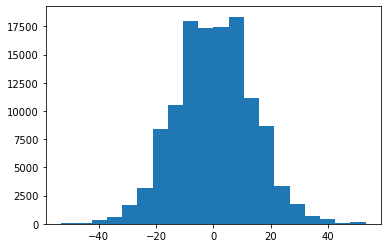

In [18]:
plt.hist(data.FINAL_MARGIN, bins = 20)
plt.show()

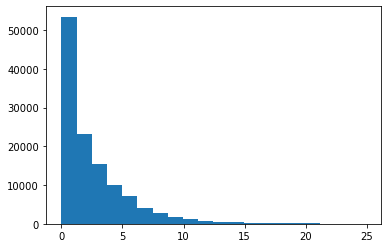

In [19]:
plt.hist(data.TOUCH_TIME, bins = 20)
plt.show()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

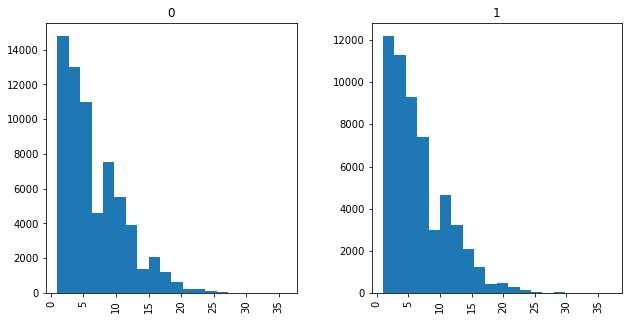

In [20]:
data.hist(column = "SHOT_NUMBER", by = "SHOT_RESULT", bins = 20, figsize = (10, 5))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

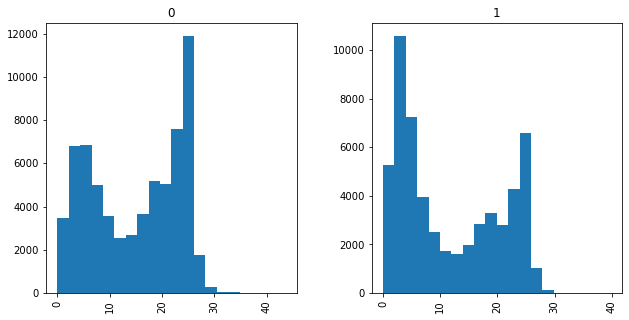

In [21]:
data.hist(column = "SHOT_DIST", by = "SHOT_RESULT", bins = 20, figsize = (10, 5))

Vidimo da su igrači najviše promašivali kad su pokušavali pogoditi trice, a najviše su zabijali dvice unutar 5 stopa od koša.

array([<AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>], dtype=object)

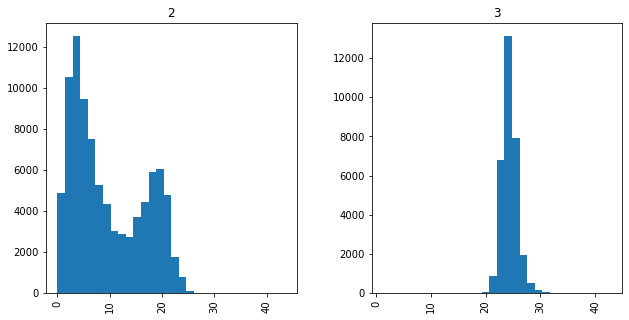

In [22]:
data.hist(column = "SHOT_DIST", by = "PTS_TYPE", bins = 30, figsize = (10, 5))

Vidimo da je većina dvica postignuta direktno unutar 10 stopa od koša, a skoro sve trice blizu linije od 22 stope gdje počinju trice.

array([<AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>], dtype=object)

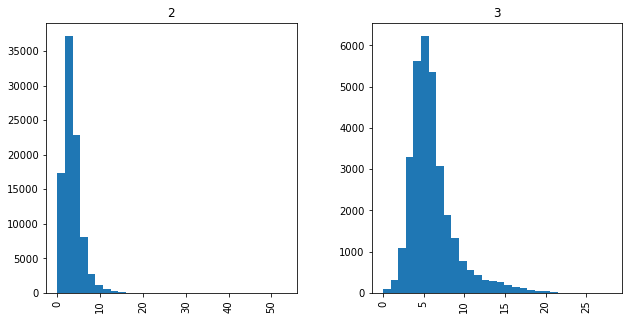

In [23]:
data.hist(column = "CLOSE_DEF_DIST", by = "PTS_TYPE", bins = 30, figsize = (10, 5))

Prilikom gađanja dvica, obrambeni igrači su se mnogo više uspjeli približiti protivničkom igraču koji je gađao koš.

Prikaz boxplotova sa stršećim vrijednostima:

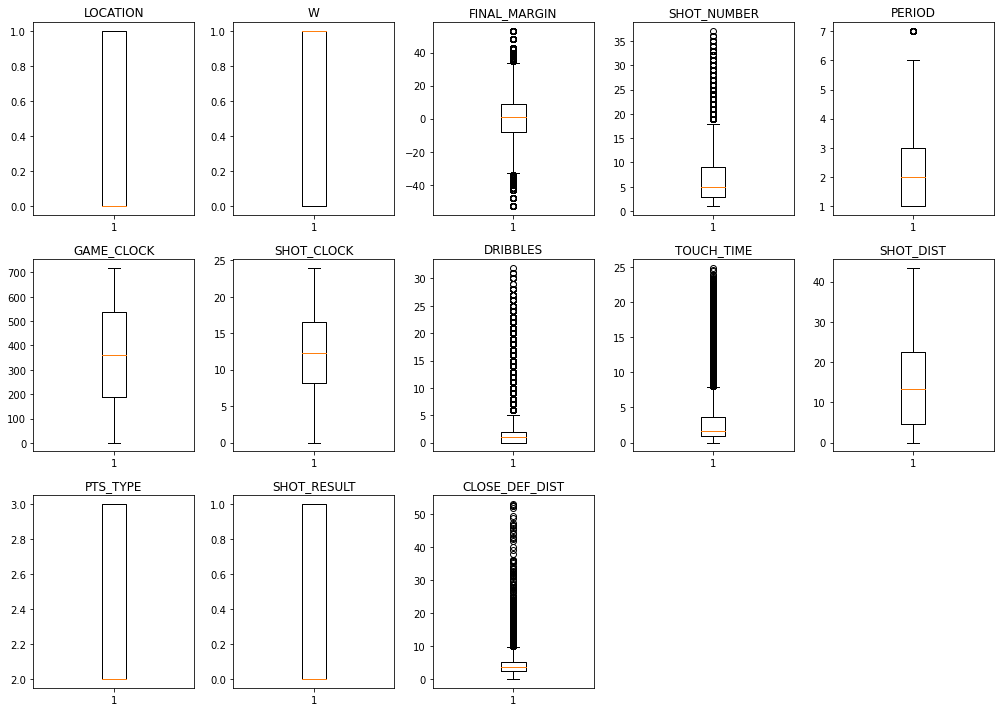

In [24]:
i = 1
plt.figure(figsize = (14, 10))
for el in data.columns:
    plt.subplot(3, 5, i)
    plt.boxplot(data[el])
    plt.title(el)
    i += 1

plt.tight_layout()
plt.show()

Vidljivo je po stršećim vrijednostima da je medijan šutiranja po utakmici 5 puta, a gornji je kvartil blizu 10 šuteva.

Prikaz boxplotova bez stršećih vrijednosti:

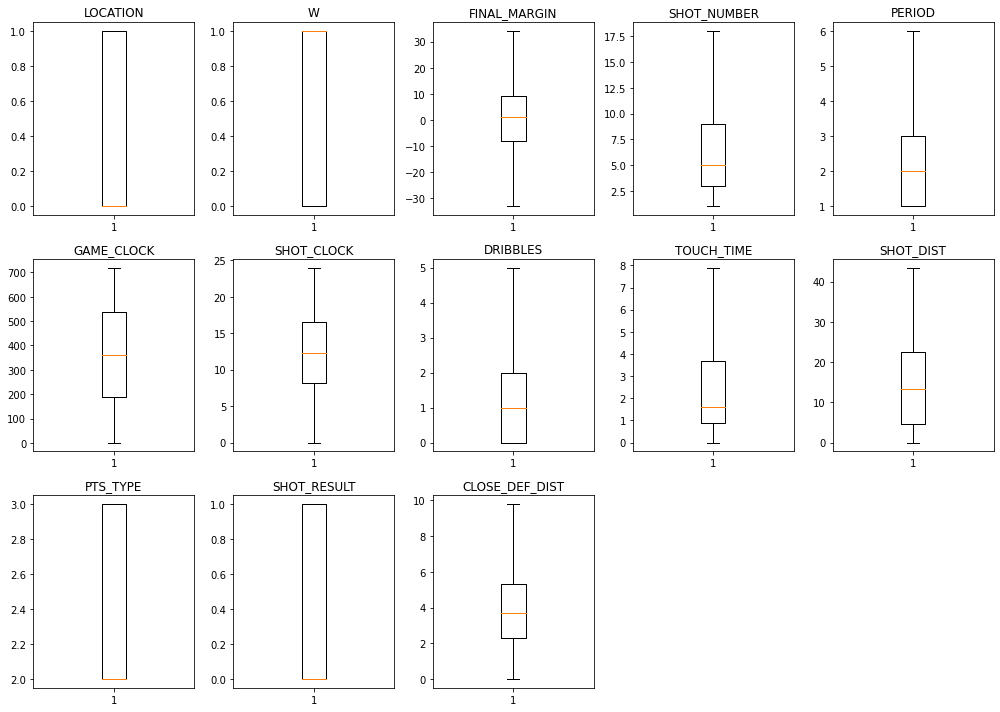

In [25]:
i = 1
plt.figure(figsize = (14, 10))
for el in data.columns:
    plt.subplot(3, 5, i)
    plt.boxplot(data[el], showfliers = False)
    plt.title(el)
    i += 1

plt.tight_layout()
plt.show()

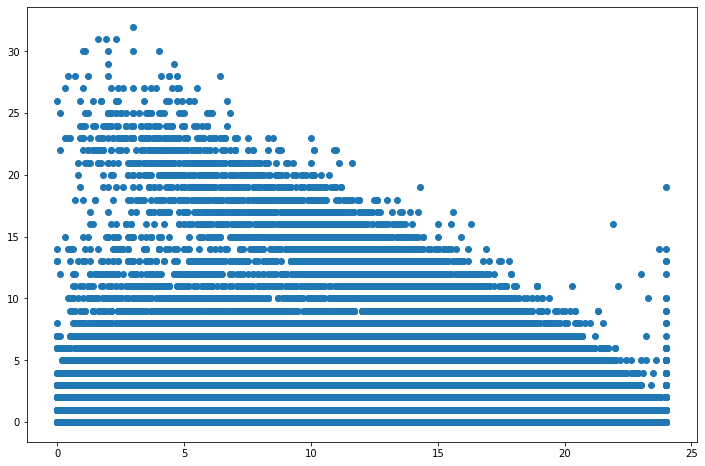

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(data.SHOT_CLOCK, data.DRIBBLES)
plt.show()

U gornjem grafu vidimo da broj driblinga pada sa sekundama posjeda.

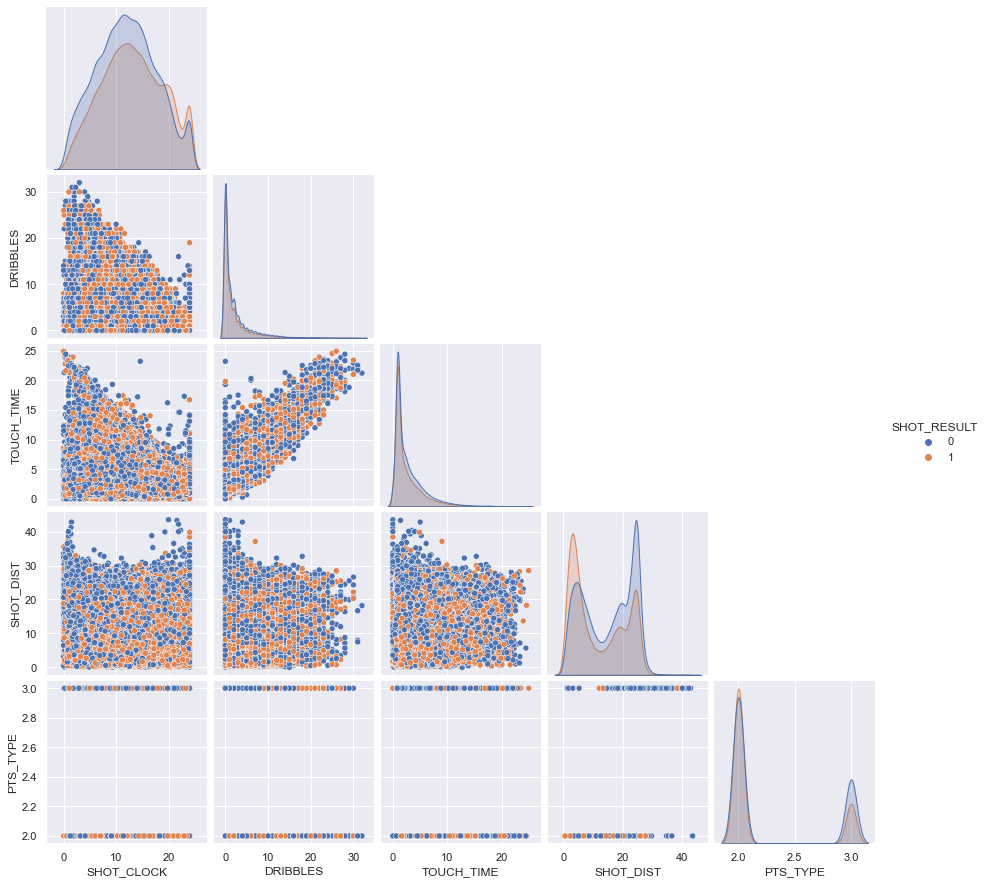

In [27]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(data.loc[:,['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 
                         'PTS_TYPE', 'SHOT_RESULT']], hue='SHOT_RESULT', corner=True)
plt.show()

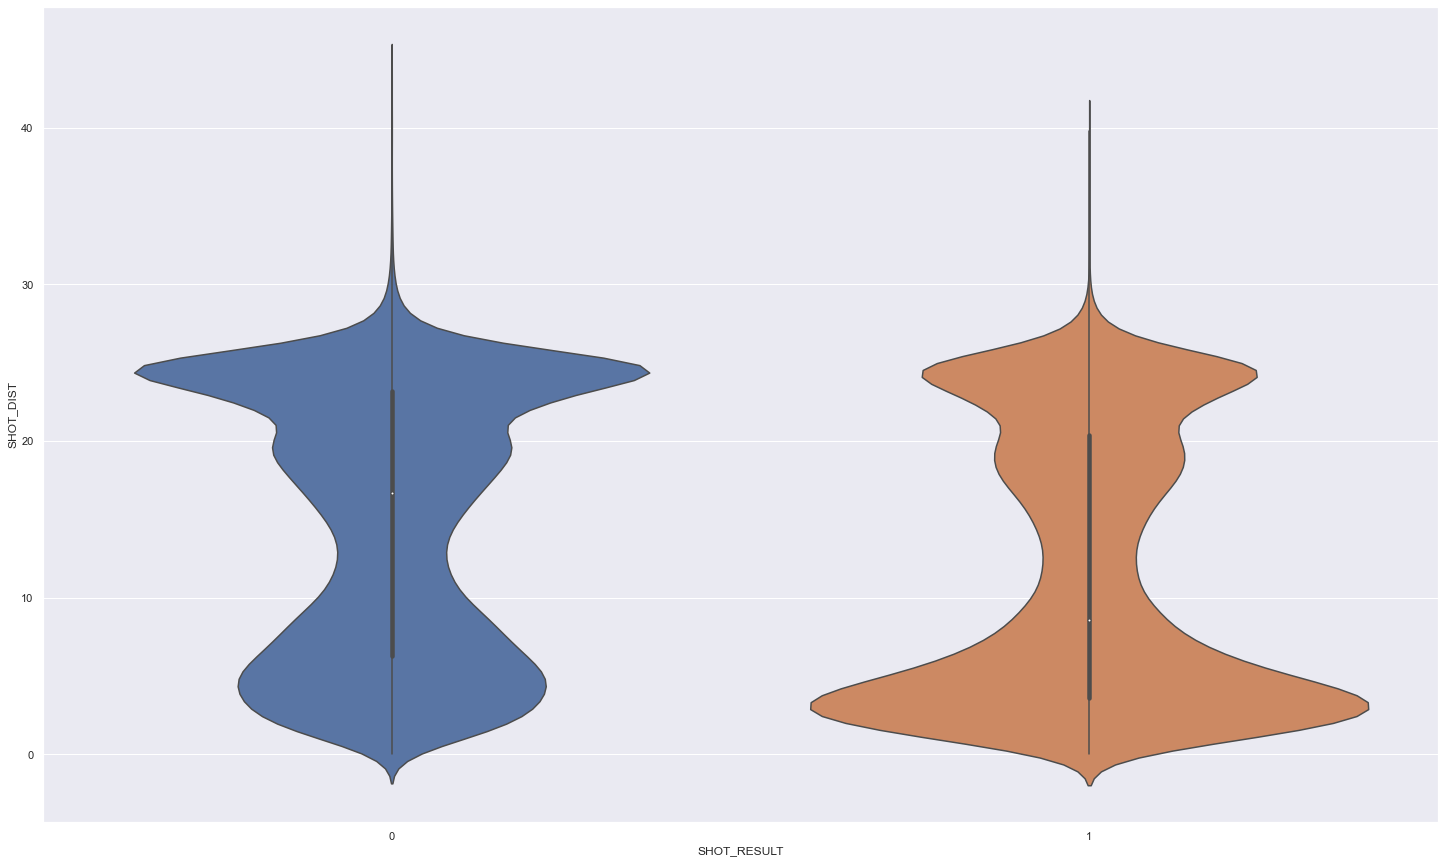

In [28]:
sns.violinplot(x = "SHOT_RESULT", y = "SHOT_DIST", data = data)
plt.show()

Vidljivo je da igrači najviše šutiraju kada su udaljeni cca. 5 ili 25 stopa od koša. 

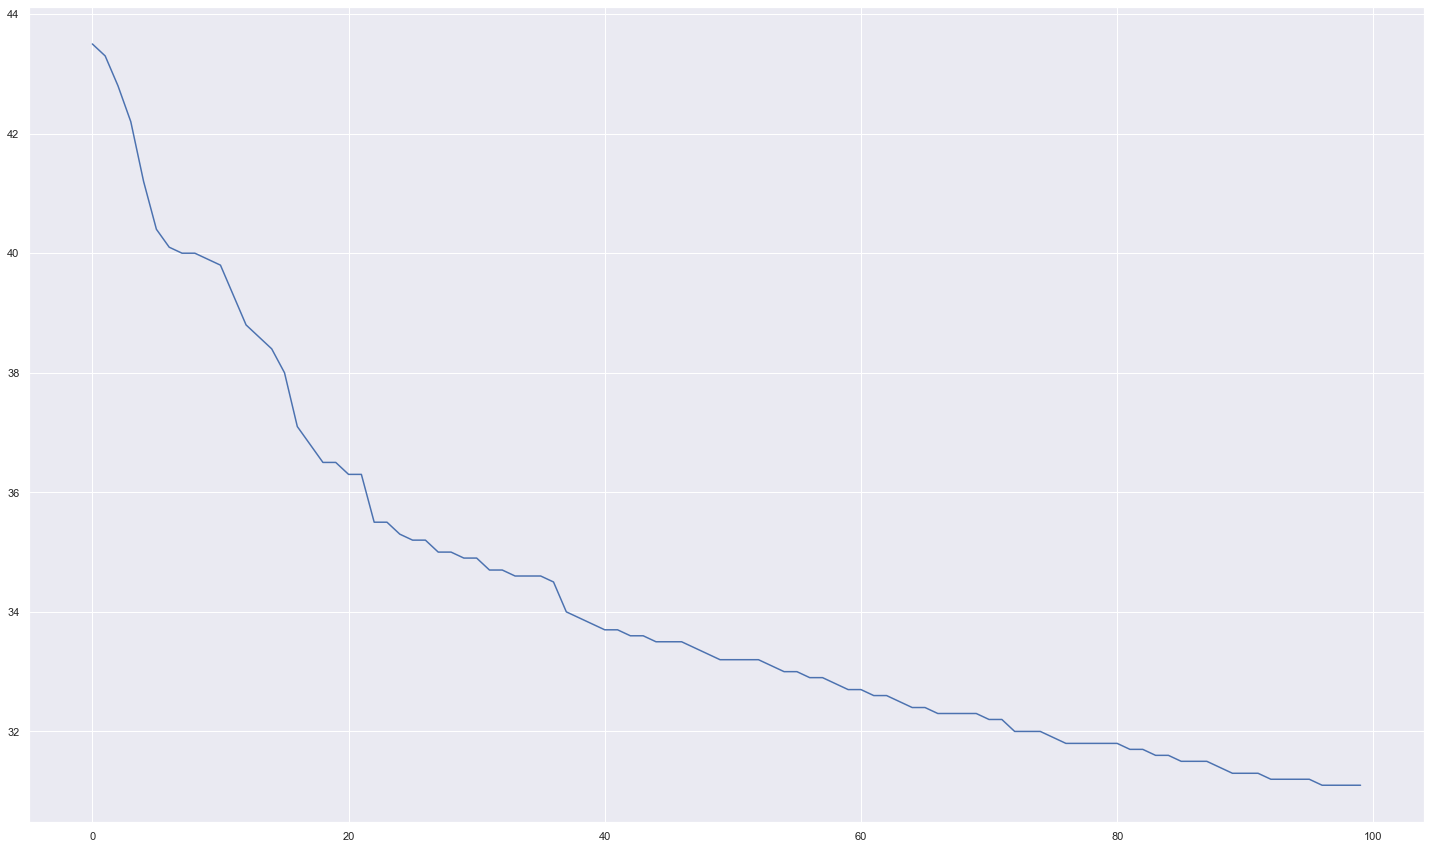

In [29]:
data_tmp = data.copy()
sorted_dist = data_tmp.sort_values(by=['SHOT_DIST'], ascending=False).SHOT_DIST.values[:100]
shot = [x for x in range(100)]

plt.plot(shot, sorted_dist)
plt.show()

Prikaz 100 najudaljenijih šuteva na koš.